Problem 1

Load two random csv files from (https://www.ncei.noaa.gov/data/local-climatological-
data/access/2023) and save it in local directory using BeautifulSoup. Then, read the file

using Pandas Dataframe and perform the following operations:
(a) Remove the columns that contain NULL values in all rows. (Marks: 5)
(b) List the number of NULL values in each column. (Marks: 5)
(c) Drop rows where at least 50% of the columns contain NULL values. (Marks: 10)
(d) Fill the NULL value with the mean value of the respective column. (Marks: 5)
(e) Compute Euclidean distance between two stations using Numpy. (Marks: 5)

In [16]:
%pip install requests beautifulsoup4

In [17]:
from bs4 import BeautifulSoup
import requests

webpage = requests.get("https://www.ncei.noaa.gov/data/local-climatological-data/access/2023")
print("Connected" if 'Index of /data/local-climatological-data/access/2023' in webpage.text else "Error")

Connected


In [18]:
soup = BeautifulSoup(webpage.text,'html.parser')
csv_links = []

if soup.text.title != "404 not found":
    all_urls = soup.find_all('a')

for url in all_urls:
    href_u = url.get('href')
    if href_u and href_u.endswith('.csv'):  # Check if the link ends with .csv
       csv_links.append(href_u)
    # print(f"HREF is:{href_u}")

print(csv_links)

['01001099999.csv', '01001499999.csv', '01002099999.csv', '01003099999.csv', '01006099999.csv', '01007099999.csv', '01008099999.csv', '01009099999.csv', '01010099999.csv', '01011099999.csv', '01015099999.csv', '01016099999.csv', '01017099999.csv', '01020099999.csv', '01023099999.csv', '01023199999.csv', '01024099999.csv', '01025099999.csv', '01026099999.csv', '01027099999.csv', '01028099999.csv', '01030099999.csv', '01033099999.csv', '01035099999.csv', '01037099999.csv', '01042099999.csv', '01043099999.csv', '01044099999.csv', '01045099999.csv', '01046099999.csv', '01047099999.csv', '01049099999.csv', '01052099999.csv', '01055099999.csv', '01057099999.csv', '01058099999.csv', '01059099999.csv', '01062099999.csv', '01065099999.csv', '01068099999.csv', '01074099999.csv', '01076099999.csv', '01078099999.csv', '01082099999.csv', '01083099999.csv', '01084099999.csv', '01086099999.csv', '01087599999.csv', '01087699999.csv', '01087799999.csv', '01087899999.csv', '01087999999.csv', '0108809999

In [19]:
import random , os
# files are changed everytime
chosen = random.sample(csv_links, 2)

print("Chosen files:", chosen)

base_url = "https://www.ncei.noaa.gov/data/local-climatological-data/access/2023/"
# formed_urls = [base_url + file for file in chosen]

for i in chosen:
    total_url = base_url + i
    file_name = os.path.basename(i)

    response = requests.get(total_url)

    with open(file_name,'wb') as file:
        file.write(response.content)
        print(f"Downloaded: {file_name}")

Chosen files: ['82791099999.csv', '15296099999.csv']
Downloaded: 82791099999.csv
Downloaded: 15296099999.csv


In [35]:
import pandas as pd

file_count=0
df_1:pd.DataFrame
df_2:pd.DataFrame
# create the dataframes
for file in chosen:
    if file_count == 0:
        df_1 = pd.read_csv(file)
        file_count+=1
    elif file_count == 1:
        df_2 = pd.read_csv(file)
        file_count+=1
    else:
        print(f'Over limit')
        # considering 2 csv only

print(f'Size of dataframe 1: {df_1.shape} \n Size of dataframe 2 : {df_2.shape}')


Size of dataframe 1: (535, 125) 
 Size of dataframe 2 : (8658, 125)


<ipython-input-35-21f6bd523663>:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(file)


In [21]:
# Remove the columns that contain NULL values in all rows.

df_1_c = df_1.copy(deep=True)

df_column_dropeed = df_1_c.dropna(axis=1)

print(f'1st dataframe:{df_1.shape,df_column_dropeed.shape}')

df_2_c = df_2.copy(deep=True)

df_column_dropeed = df_2_c.dropna(axis=1)

print(f'2nd dataframe:{df_2.shape,df_column_dropeed.shape}')


1st dataframe:((535, 125), (535, 12))
2nd dataframe:((8658, 125), (8658, 13))


In [22]:
# List the number of NULL values in each column. (Marks: 5)

df_1_d = df_1.copy(deep=True)
df_2_d = df_2.copy(deep=True)

df_1_estimate_null = df_1_d.isnull().sum()
df_2_estimate_null = df_2_d.isnull().sum()

print(f'Null rows are :{df_1_estimate_null}')

print(f'Null rows of df 2 are :{df_2_estimate_null}')



Null rows are :STATION                      0
DATE                         0
LATITUDE                     0
LONGITUDE                    0
ELEVATION                    0
                          ... 
BackupEquipment            535
BackupLatitude             535
BackupLongitude            535
BackupName                 535
WindEquipmentChangeDate    535
Length: 125, dtype: int64
Null rows of df 2 are :STATION                       0
DATE                          0
LATITUDE                      0
LONGITUDE                     0
ELEVATION                     0
                           ... 
BackupEquipment            8658
BackupLatitude             8658
BackupLongitude            8658
BackupName                 8658
WindEquipmentChangeDate    8658
Length: 125, dtype: int64


question 2: Consider the following numerical system describing the Lotka-Volterra model of predator
prey dynamics:

dx
dt = αx − βxy (1)
dy
dt = −γy + δxy (2)

where α, β, γ and δ are parameters.
(a) Simulate the system for the parameter values α = 1, β = 0.5, γ = 0.2, δ = 0.3.
Initial values can be taken as x0 = 100, y0 = 10. (Marks: 10)
(b) Plot the dynamics of the system. (Marks: 10)

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [24]:
def objective_func(z, t, alpha, beta, gamma, delta):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

In [25]:
# given values
alpha = float(1)
beta = 0.5
gamma = 0.2
delta = 0.3
x0 = 100
y0 = 10
z0 = [x0, y0]

print(alpha)

1.0


In [26]:
# creating a linearly spaced list
t = np.linspace(0,90,1000)

print(t[1:10])

[0.09009009 0.18018018 0.27027027 0.36036036 0.45045045 0.54054054
 0.63063063 0.72072072 0.81081081]


In [27]:
# Solve the ODE system
solution = odeint(
        objective_func,
        z0,
        t,
        args=(alpha, beta, gamma, delta))
x = solution[:, 0]
y = solution[:, 1]

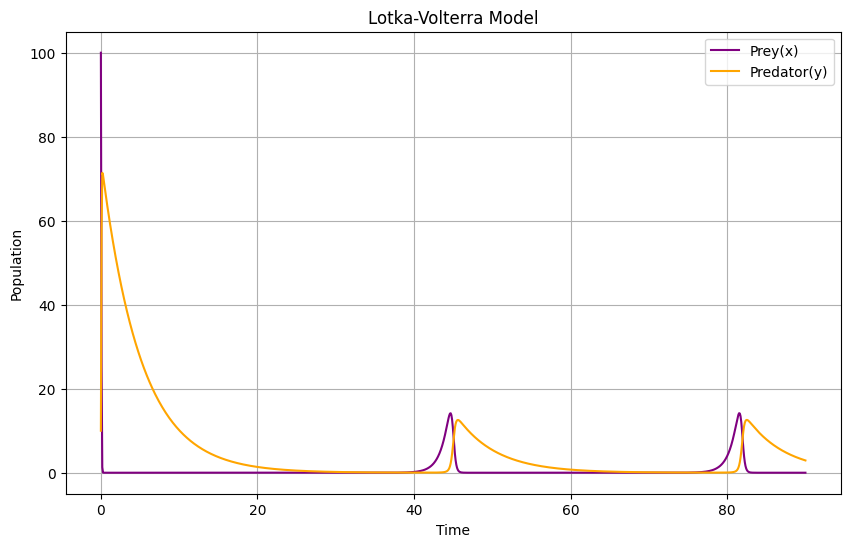

In [28]:

# plotting

plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Prey(x)',color='purple',linestyle='-')
plt.plot(t, y, label='Predator(y)',color='orange')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()



---



---



Q3:

A smart home system collects data on various factors affecting energy consumption.
The dataset contains 500 samples with 9 input features and the target variable, Energy
Consumption (kWh).
(a) Fit the data to both Multiple Linear Regression (MLR) and Polynomial Regression
models. (Marks: 10)
(b) Compare the models based on their performance metrics (e.g., R2 score, RMSE).
(Marks: 10)
(c) Determine which model fits the data better and explain why. (Marks: 10)
Hints: Use train test split() to split the data, apply StandardScaler before fitting models,
and use cross-validation.


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv('smart_home_energy_consumption.csv')

# spliting data into independent variables and target variables


X= df.iloc[:,:-1] # first 9 will be features
y= df.iloc[:,-1]
# df.head(1)


In [37]:
X

,Indoor Temperature (°C),Outdoor Temperature (°C),Humidity (%),Appliance Usage (kW),Solar Power Generated (kW),Time of Day (hours),Wind Speed (m/s),Room Temp Variation (°C),HVAC Runtime (hours)
0,25.490142,24.261775,70.990332,3.278361,1.027375,14.853065,1.184385,2.590320,2.136506
1,23.585207,34.094166,63.869505,1.948814,1.398837,16.840923,3.279230,1.686343,2.968797
2,25.943066,1.014324,50.894456,1.681801,0.945306,10.343458,4.172789,2.022611,3.018017
3,28.569090,20.629692,40.295948,2.496626,1.284427,8.938816,8.775375,2.025599,3.472630
4,23.297540,8.493574,60.473350,2.329815,0.174470,6.574247,6.113106,1.749108,1.633142
...,...,...,...,...,...,...,...,...,...
495,25.616730,12.188997,80.091393,3.570150,2.069244,12.387403,8.870308,2.014229,4.677377
496,20.888262,32.976865,80.922554,2.473479,1.304726,13.288763,6.631002,0.961094,2.194828
497,23.428984,21.408429,68.125493,1.618125,1.304168,5.791197,4.903823,1.839851,4.076848
498,21.373145,9.288210,65.360938,2.336933,2.053260,13.670882,4.633699,2.821689,0.830323


In [38]:
y

,Energy Consumption (kWh)
0,23.533424
1,16.133928
2,23.578651
3,20.587356
4,23.804048
...,...
495,30.231123
496,21.277844
497,28.842971
498,25.376210


In [39]:
df.shape

(500, 10)

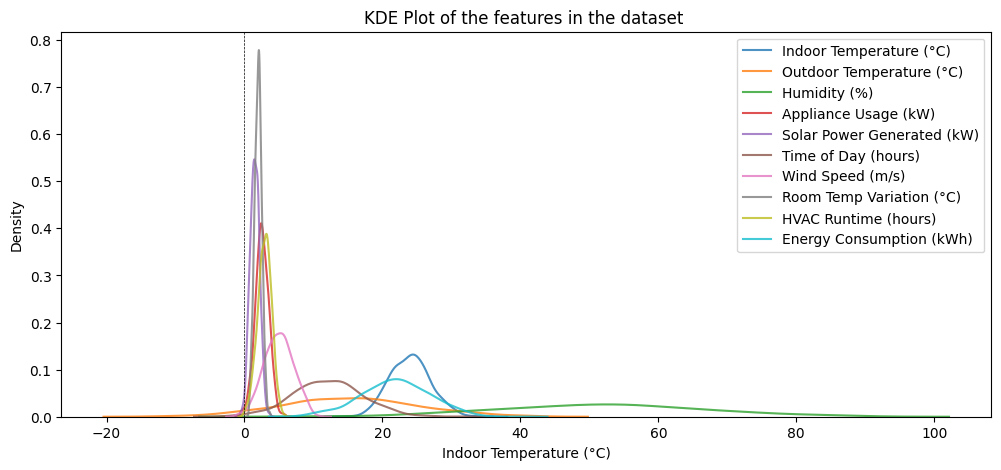

In [40]:

# checking scaling using KDE plot

plt.figure(figsize=(12, 5))
for col in df.columns:
    sns.kdeplot(df[col], label=col, alpha=0.8)

plt.axvline(x=0, color="black", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("KDE Plot of the features in the dataset(before scaling) ")
plt.show()

- KDE plot shows data is not scaled

In [41]:
# https://freedium.cfd/https://medium.com/@megha.natarajan/scaling-data-before-or-after-train-test-split-35e9a9a7453f

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=39)

X_train.shape,X_test.shape,y_train.shape,y_test.shape


((400, 9), (100, 9), (400,), (100,))

In [51]:
# scaling data

scaler = StandardScaler()

# Fit only on training data and transform both training & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform using the same scaler

y_scaler = StandardScaler()
Y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
Y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


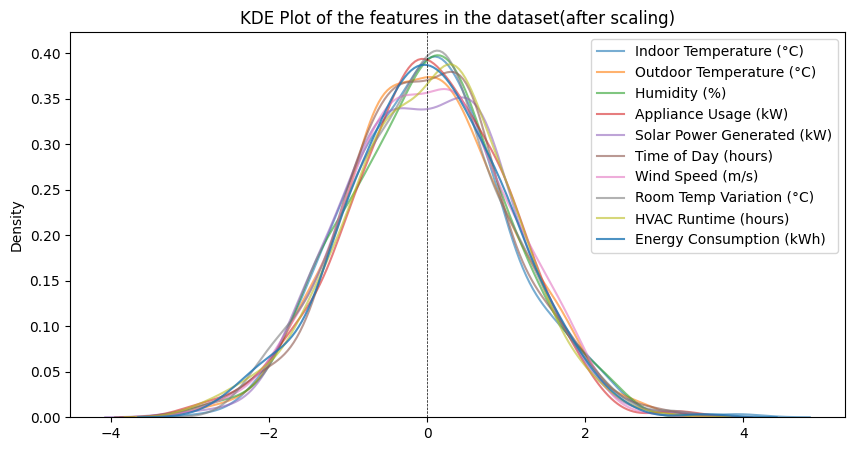

In [52]:
# checking scaling again using KDE plot

plt.figure(figsize=(10, 5))
for i in range(X_train_scaled.shape[1]):
    sns.kdeplot(X_train_scaled[:, i], label=X_train.columns[i], alpha=0.6)


sns.kdeplot(Y_train_scaled, label=y_train.name, alpha=0.8)

plt.axvline(x=0, color="black", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("KDE Plot of the features in the dataset(after scaling)")
plt.show()



---
Figure indicates good level of scaling about mean


- (a)
      Fit the data to both Multiple Linear Regression     
      (MLR) and Polynomial Regression models.

In [53]:
#Multiple Linear Regression

model_MLR = LinearRegression(fit_intercept=True).fit(X_train_scaled, Y_train_scaled)

# Model Coefficients
print("Model Coefficients: ", model_MLR.coef_)
print("Model Intercept: ", model_MLR.intercept_)

Model Coefficients:  [[ 0.28543816 -0.58600577  0.6217358   0.18187485 -0.08943795  0.11592929
  -0.07946949  0.06404919  0.12182965]]
Model Intercept:  [2.19865472e-16]
